In [2]:
# import numpy as np # 导入NumPy数学工具箱
# import pandas as pd # 导入Pandas数据处理工具箱
import tensorflow as tf
# from keras.datasets import mnist #从Keras中导入mnist数据集
#读入训练集和测试集
# (X_train_image, y_train_lable), (X_test_image, y_test_lable) = mnist.load_data() 
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train_image, y_train_lable), (X_test_image, y_test_lable) = tf.keras.datasets.mnist.load_data() 

2025-06-11 11:27:11.032996: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print ("特征集张量形状train：", X_train_image.shape) #用shape方法显示张量的形状
print ("特征集张量形状train：", y_train_lable.shape) #用shape方法显示张量的形状
print ("特征集张量形状test：", X_test_image.shape) #用shape方法显示张量的形状
print ("特征集张量形状test：", y_test_lable.shape) #用shape方法显示张量的形状
print ("第一个数据样本：\n", X_train_image[0]) #注意Python的索引是从0开始的
print (len(X_train_image[0]), len(X_train_image[0][0]))

特征集张量形状train： (60000, 28, 28)
特征集张量形状train： (60000,)
特征集张量形状test： (10000, 28, 28)
特征集张量形状test： (10000,)
第一个数据样本：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 2

In [3]:
print ("第一个数据样本的标签：", y_train_lable[0])

第一个数据样本的标签： 5


In [4]:
from tensorflow.keras.utils import to_categorical # 导入keras.utils工具箱的类别转换工具
X_train = X_train_image.reshape(60000,28,28,1) # 给标签增加一个维度
X_test = X_test_image.reshape(10000,28,28,1) # 给标签增加一个维度
y_train = to_categorical(y_train_lable, 10) # 特征转换为one-hot编码
y_test = to_categorical(y_test_lable, 10) # 特征转换为one-hot编码
print ("数据集张量形状：", X_train.shape) # 特征集张量的形状
print ("第一个数据标签：",y_train[0]) # 显示标签集的第一个数据

数据集张量形状： (60000, 28, 28, 1)
第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
from keras import models # 导入Keras模型, 和各种神经网络的层
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = models.Sequential() # 用序贯方式建立模型
model.add(Conv2D(32, (3, 3), activation='relu', # 添加Conv2D层
                 input_shape=(28,28,1))) # 指定输入数据样本张量的类型
model.add(MaxPooling2D(pool_size=(2, 2))) # 添加MaxPooling2D层
model.add(Conv2D(64, (3, 3), activation='relu')) # 添加Conv2D层
model.add(MaxPooling2D(pool_size=(2, 2))) # 添加MaxPooling2D层
model.add(Dropout(0.25)) # 添加Dropout层
model.add(Flatten()) # 展平
model.add(Dense(128, activation='relu')) # 添加全连接层
model.add(Dropout(0.5)) # 添加Dropout层
model.add(Dense(10, activation='softmax')) # Softmax分类激活，输出10维分类码
# 编译模型
model.compile(optimizer='rmsprop', # 指定优化器
              loss='categorical_crossentropy', # 指定损失函数
              metrics=['accuracy']) # 指定验证过程中的评估指标

/Users/de/.pyenv/versions/3.11.8/envs/ml3118/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(X_train, y_train, # 指定训练特征集和训练标签集
          validation_split = 0.3, # 部分训练集数据拆分成验证集
          epochs=5, # 训练轮次为5轮
          batch_size=128) # 以128为批量进行训练

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6740 - loss: 5.3582 - val_accuracy: 0.9665 - val_loss: 0.1048
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9390 - loss: 0.2176 - val_accuracy: 0.9769 - val_loss: 0.0870
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9623 - loss: 0.1411 - val_accuracy: 0.9747 - val_loss: 0.0932
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.9686 - loss: 0.1108 - val_accuracy: 0.9804 - val_loss: 0.0821
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9734 - loss: 0.0938 - val_accuracy: 0.9785 - val_loss: 0.0829


In [7]:
score = model.evaluate(X_test, y_test) # 在测试集上进行模型评估
print('测试集预测准确率:', score[1]) # 打印测试集上的预测准确率

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9748 - loss: 0.0937
测试集预测准确率: 0.9803000092506409


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[5.5436285e-17 5.2677611e-12 1.5093864e-11 2.3662509e-12 8.8505956e-15
 1.0391063e-14 1.8463708e-19 1.0000000e+00 7.5205777e-15 2.6021811e-12] 转换一下格式得到： 7


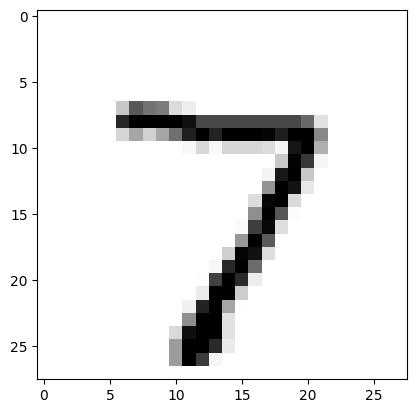

In [8]:
pred = model.predict(X_test[0].reshape(1, 28, 28, 1)) # 预测测试集第一个数据
print(pred[0],"转换一下格式得到：",pred.argmax()) # 把one-hot码转换为数字
import matplotlib.pyplot as plt # 导入绘图工具包
plt.imshow(X_test[0].reshape(28, 28),cmap='Greys') # 输出这个图片